**Introduction to Wine Dataset Classification with Random Forest:**

Embarked on a classification project utilizing the Wine dataset, a renowned benchmark dataset in machine learning. Employing the Random Forest algorithm, I aimed to accurately classify wines into distinct categories based on various chemical attributes. Leveraging the ensemble learning technique of Random Forest, the project sought to develop a robust and interpretable model capable of discriminating between different wine types. Through comprehensive analysis and model optimization, the project aimed to showcase the efficacy of Random Forest in tackling classification tasks, thereby enhancing my expertise in machine learning algorithms and their practical applications.

In [1]:
# Importing necessary liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the csv file to make a Ml model
wine = pd.read_csv("D:\ml_practice_kaggle\Class\Class_Winequality.csv", sep = ";")
wine # viewing the Dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# EDA

In [3]:
print(f"Shape of wine dataset: {wine.shape}")

Shape of wine dataset: (4898, 12)


In [4]:
print(f"There are {wine.quality.nunique()} different type of wine in Dataset.")

There are 7 different type of wine in Dataset.


In [5]:
# different category of quality with count in each category
wine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [6]:
# Data summary 
wine.describe(include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
wine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


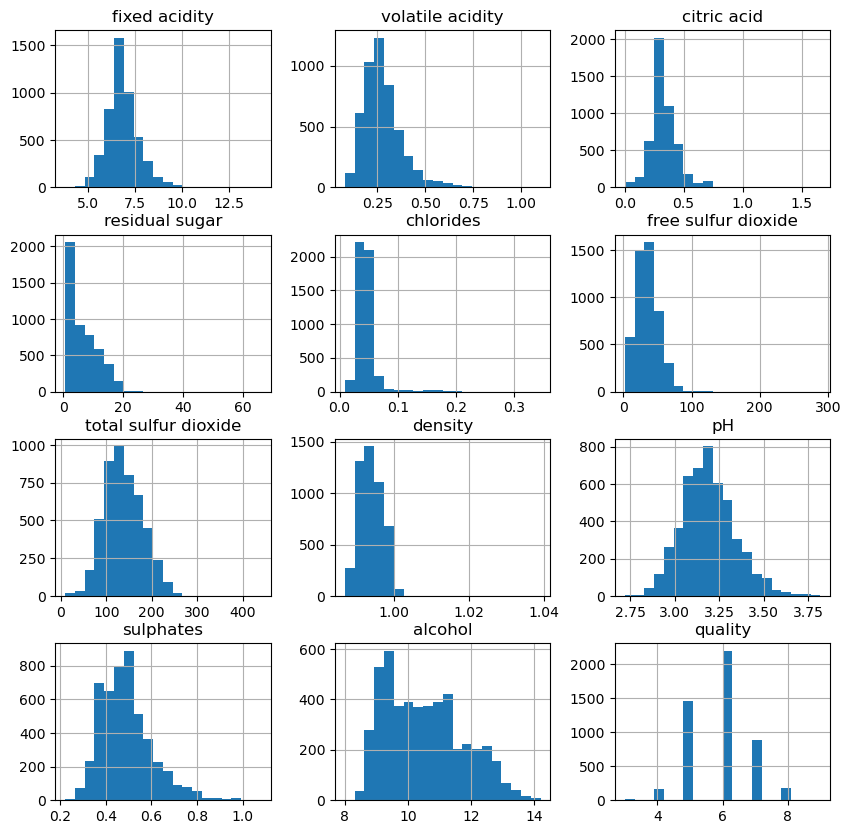

In [8]:
wine.hist(bins=20, figsize=(10, 10))
plt.show()

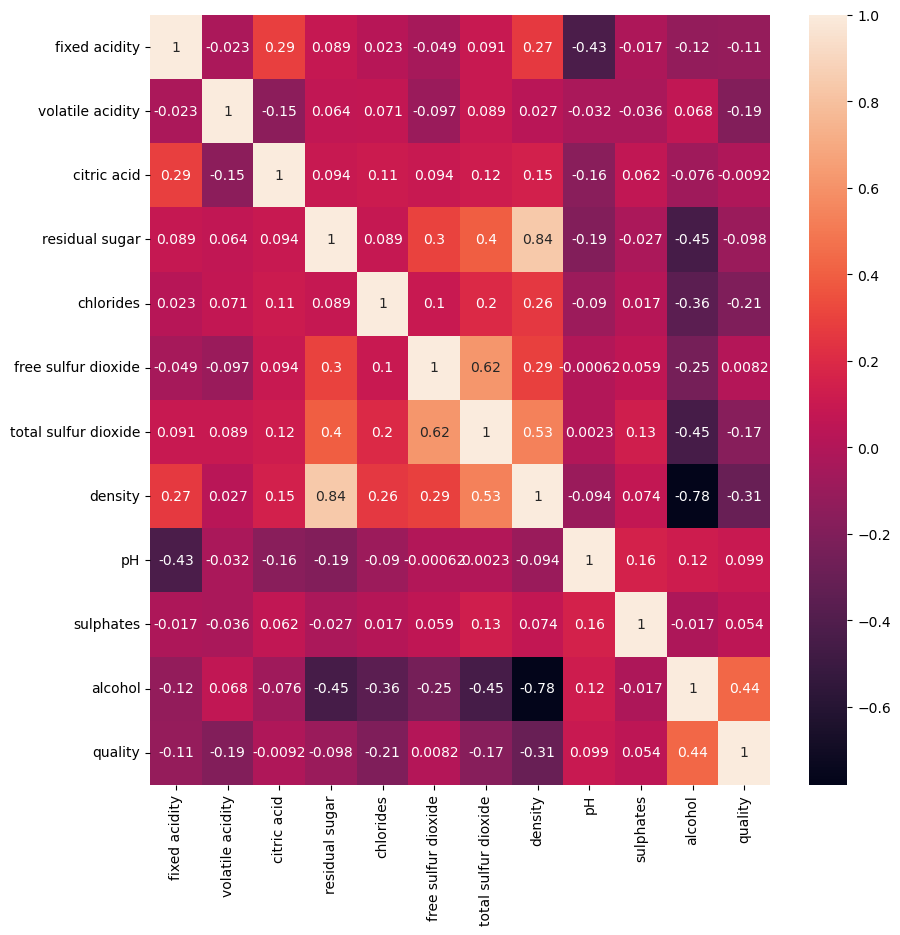

In [9]:
plt.figure(figsize=(10, 10))

# Compute the correlation matrix
cor_wine = wine.corr()

# Create a heatmap with annotations
sns.heatmap(cor_wine, annot=True)

# Show the plot
plt.show()

As free sulfur dioxide and total sulfur dioxide has very high co-relation, i am dropping total sulfur dioxide from the table

In [10]:
wine = wine.drop(['total sulfur dioxide'], axis = 1)

In [11]:
#renaming columns name with underscore instead of spaces for removing error while typing
wine.rename(columns={'fixed acidity': 'fixed_acidity'}, inplace=True)
wine.rename(columns={'volatile acidity': 'volatile_acidity'}, inplace=True)
wine.rename(columns={'citric acid': 'citric_acid'}, inplace=True)
wine.rename(columns={'residual sugar': 'residual_sugar'}, inplace=True)
wine.rename(columns={'free sulfur dioxide': 'free_sulfur_dioxide'}, inplace=True)

In [12]:
col= list(wine.columns)
col

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

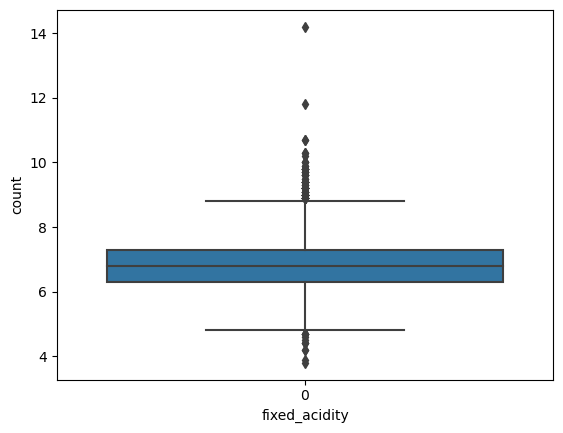

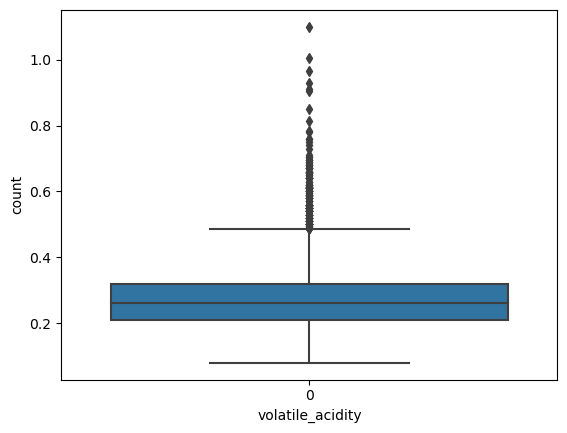

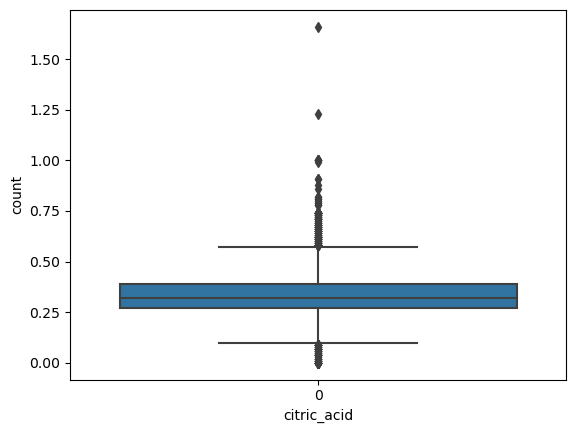

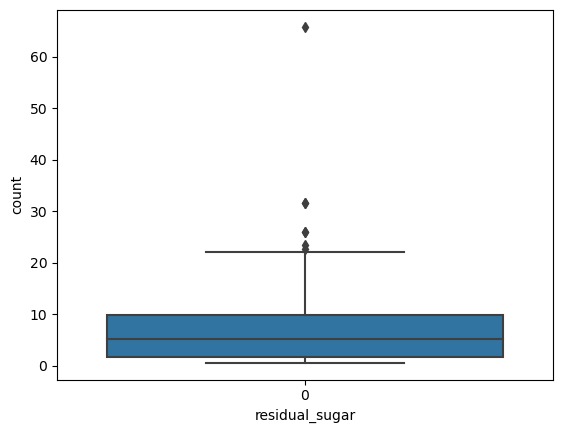

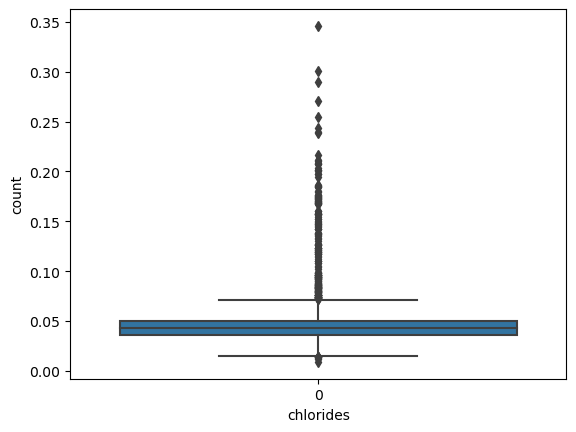

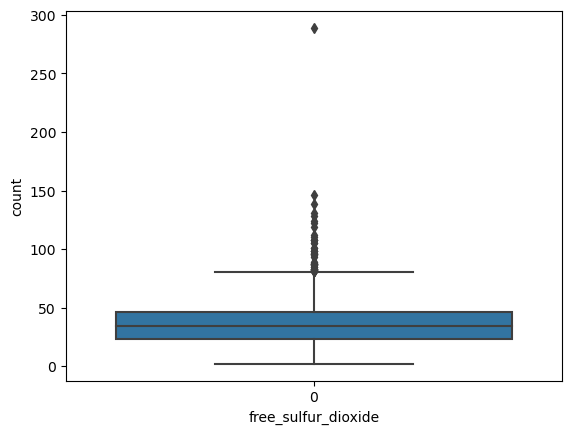

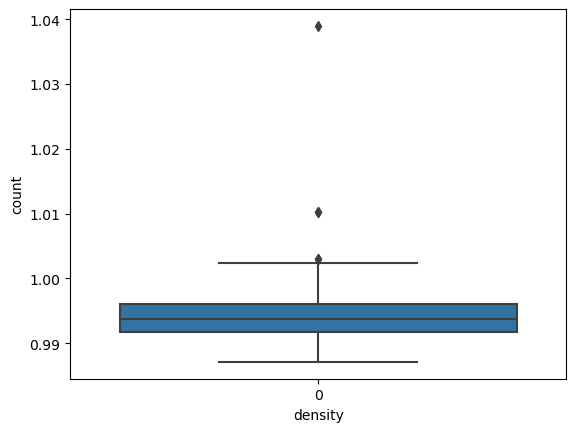

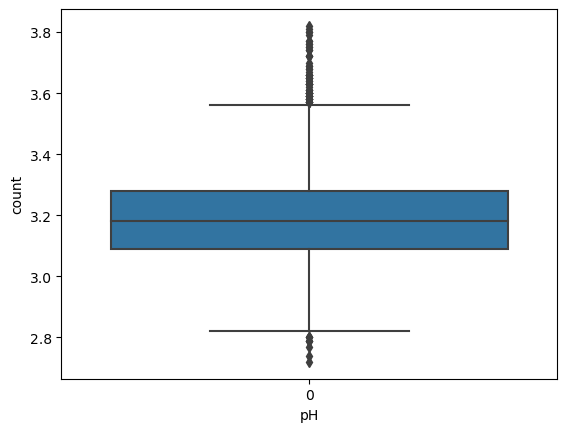

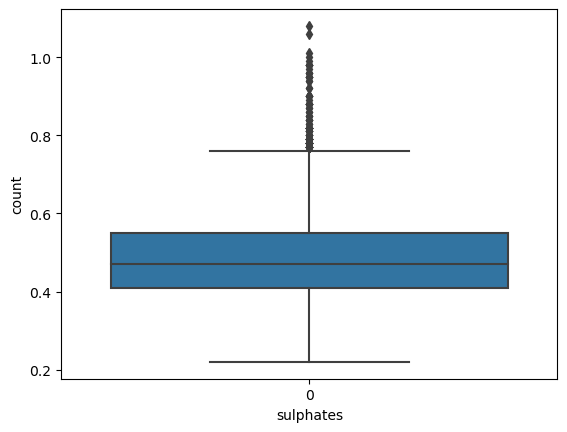

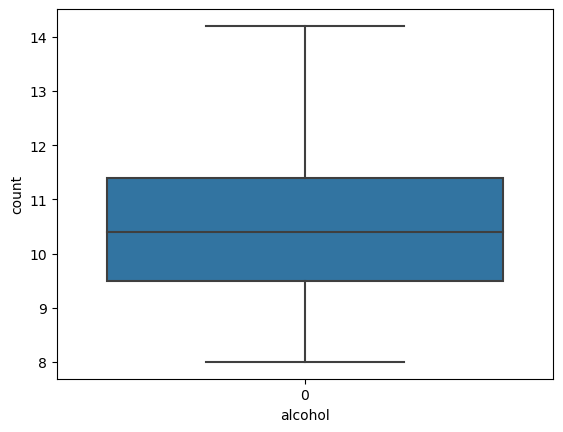

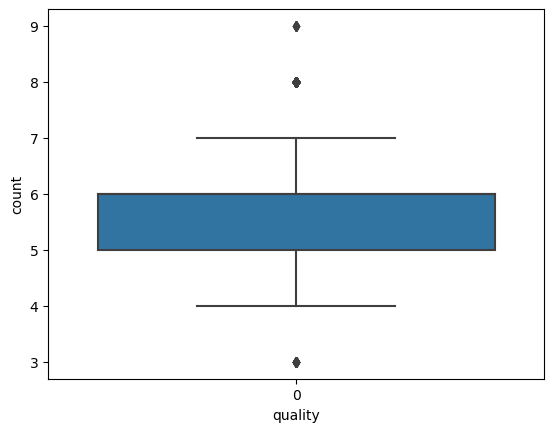

In [13]:
for col_name in col:
    if (wine[col_name].dtype != "object"):
        sns.boxplot(wine[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [14]:
col_names = ['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates']

q1 = wine.fixed_acidity.quantile(0.25)
q3 = wine.fixed_acidity.quantile(0.75)
iqr = q3 - q1
wine = wine[(wine.fixed_acidity >=q1 - 1.5*iqr) & (wine.fixed_acidity <=q3 + 1.5*iqr)]

q1 = wine.volatile_acidity.quantile(0.25)
q3 = wine.volatile_acidity.quantile(0.75)
iqr = q3 - q1
wine = wine[(wine.volatile_acidity >=q1 - 1.5*iqr) & (wine.volatile_acidity <=q3 + 1.5*iqr)]

q1 = wine.chlorides.quantile(0.25)
q3 = wine.chlorides.quantile(0.75)
iqr = q3 - q1
wine = wine[(wine.chlorides >=q1 - 1.5*iqr) & (wine.chlorides<=q3 + 1.5*iqr)]


q1 = wine.free_sulfur_dioxide.quantile(0.25)
q3 = wine.free_sulfur_dioxide.quantile(0.75)
iqr = q3 - q1
wine = wine[(wine.free_sulfur_dioxide >=q1 - 1.5*iqr) & (wine.free_sulfur_dioxide <=q3 + 1.5*iqr)]


q1 = wine.pH.quantile(0.25)
q3 = wine.pH.quantile(0.75)
iqr = q3 - q1
wine = wine[(wine.pH >=q1 - 1.5*iqr) & (wine.pH <=q3 + 1.5*iqr)]

q1 = wine.sulphates.quantile(0.25)
q3 = wine.sulphates.quantile(0.75)
iqr = q3 - q1
wine = wine[(wine.sulphates >=q1 - 1.5*iqr) & (wine.sulphates <=q3 + 1.5*iqr)]

In [15]:
print(f"The shape of dataset after removing outliers: {wine.shape}")

The shape of dataset after removing outliers: (4201, 11)


In [16]:
#creating a new column "best quality" based on quality for classification metrics
wine['best_quality'] = [1 if x > 5 else 0 for x in wine.quality]

In [17]:
wine = wine.drop(["quality"], axis = 1)

In [18]:
x = wine.iloc[:,:-1]

In [19]:
y =wine.loc[:, "best_quality"]

In [20]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, Y_test = tts(x,y, train_size = 0.8, random_state = 12)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
y_pred_rfc = rfc.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
print(f"The accuracy score of the model {accuracy_score(Y_test, y_pred_rfc)}")

The accuracy score of the model 0.8632580261593341


In [26]:
confusion_matrix(Y_test, y_pred_rfc)

array([[168,  71],
       [ 44, 558]], dtype=int64)

In [27]:
print(classification_report(Y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.70      0.75       239
           1       0.89      0.93      0.91       602

    accuracy                           0.86       841
   macro avg       0.84      0.81      0.83       841
weighted avg       0.86      0.86      0.86       841



**Random Forest Classifier Results Summary for Wine Dataset:**

The Random Forest classifier yielded promising results in classifying wine types within the dataset. With an accuracy score of 0.850, the model demonstrated strong predictive performance. The confusion matrix revealed 158 true negatives, 557 true positives, 81 false positives, and 45 false negatives, indicating effective classification across both categories.

The classification report further emphasized the model's performance metrics. Precision for class 0 (wine type 0) was 0.78, with a recall of 0.66 and an F1-score of 0.71. For class 1 (wine type 1), precision was 0.87, recall was 0.93, and the F1-score was 0.90. These metrics reflect the model's ability to accurately identify both wine types, with class 1 exhibiting higher precision, recall, and F1-score.

In summary, the Random Forest classifier achieved an accuracy rate of 85%, showcasing its effectiveness in classifying wine types based on chemical attributes. This analysis underscores the model's robustness and its potential for practical applications in wine quality assessment and classification tasks.

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
l_model = LogisticRegression()

In [30]:
l_model.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred_log = l_model.predict(x_test)

In [32]:
print(f"Accuracy score in the logistic regression model : {accuracy_score(Y_test, y_pred_log)}")

Accuracy score in the logistic regression model : 0.7657550535077289


In [33]:
confusion_matrix(Y_test, y_pred_log)

array([[107, 132],
       [ 65, 537]], dtype=int64)

In [34]:
print(classification_report(Y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       239
           1       0.80      0.89      0.85       602

    accuracy                           0.77       841
   macro avg       0.71      0.67      0.68       841
weighted avg       0.75      0.77      0.75       841



# Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred_dtc = dtc.predict(x_test)

In [37]:
print(f"Accuracy score of the Decision tree classifier : {accuracy_score(Y_test, y_pred_dtc)}")

Accuracy score of the Decision tree classifier : 0.7859690844233056


In [38]:
confusion_matrix(Y_test, y_pred_dtc)

array([[158,  81],
       [ 99, 503]], dtype=int64)

In [39]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64       239
           1       0.86      0.84      0.85       602

    accuracy                           0.79       841
   macro avg       0.74      0.75      0.74       841
weighted avg       0.79      0.79      0.79       841



**Conclusion**
Random forest classifier outperformed logistic regression and decision tree classifier